# Shamir's Secret Sharing

Motivating example is where you want to be able to recover a secret if enough shares from others are retrieved. For instance, if an agent leaves the party, be able to get the secret back.

In [170]:
%load_ext autoreload
%autoreload 2
from IPython.display import display
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import Dependencies

In [154]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.random import default_rng
import matplotlib.pyplot as plt

### Create secret shares

In [164]:
# Choose a maximum coefficient size
FIELD_SIZE = 256


def shamirs_create_shares(secret: int, n: int, t: int):

    rng = default_rng()

    # create a new polynomial degree t-1
    p = rng.integers(1, FIELD_SIZE, size=t-1)

    # append the secret as the constant value
    p = np.append(p, secret)

    # take random samples along the polynomial
    x = rng.choice(FIELD_SIZE, size=n, replace=False)
    y = np.polyval(p, x)

    return np.column_stack(( x, y ))

secret = 42
num_shares = 5
num_threshold = 3

shares = shamirs_create_shares(secret, num_shares, num_threshold)

display(shares)



array([[    155, 3387722],
       [    223, 6996890],
       [    132, 2459994],
       [     77,  842114],
       [     89, 1122866]])

### Recover the secret shares

In [165]:
trimmed_shares = shares[0:num_threshold]
print(trimmed_shares)

def shamirs_reconstruct_secret(shares) -> int:
    x, y = shares[:,0], shares[:,1]
    f = lagrange(x, y)
    return round(f[0])

shamirs_reconstruct_secret(trimmed_shares)

[[    155 3387722]
 [    223 6996890]
 [    132 2459994]]


42

### Intuition

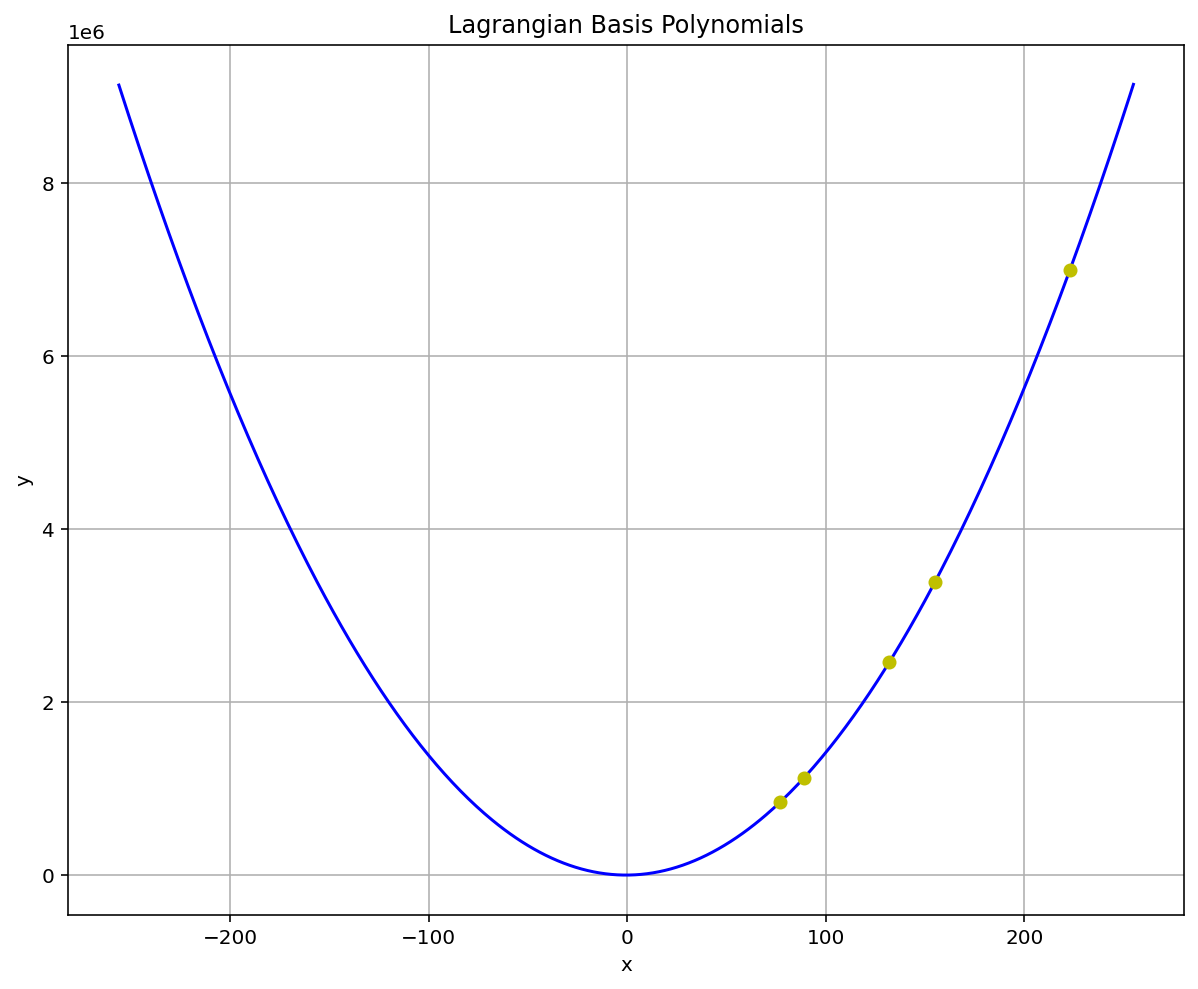

In [171]:
x, y = shares[:,0], shares[:,1]
f = lagrange(x, y)

x_new = np.arange(-256, 256, 1)

fig = plt.figure(figsize = (10, 8))
plt.title('Lagrangian Basis Polynomials')
plt.plot(x_new, f(x_new), 'b', x, y, 'yo')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()